<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt


### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [97]:
train = pd.read_csv('train.csv')
# train = data.iloc[0:1460,:]

train.to_json('housedata.json')
train.head()

test_data = pd.read_csv('test.csv')

test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


# New Section

In [98]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [99]:
# Here is the setup for the linear regression model
# import necessary libraries. Then we will run the model. 
# Once we have run it we will come back up here and remove unnecessary variables.
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

# Only keep the numeric variables
train_numeric = train.select_dtypes(include=[np.number])
test_numeric = test_data.select_dtypes(include=[np.number])
# Setup the x_training values by taking all columns except the SalePrice.
x_train = train_numeric.drop('SalePrice', axis=1)
# Setup the y_training values by taking the SalePrice column.
y_train = train_numeric['SalePrice']
# remove all nan values.
x_train = x_train.fillna(0)
x_test = test_numeric.fillna(0)

# Now below here is where I start to trim out the variables that are not needed.
x_train = x_train.drop('Id', axis=1)
x_train = x_train.drop('LotFrontage', axis=1)
x_train = x_train.drop('BsmtFinSF2', axis=1)
x_train = x_train.drop('BsmtUnfSF', axis=1)
x_train = x_train.drop('LowQualFinSF', axis=1)
x_train = x_train.drop('BsmtHalfBath', axis=1)
x_train = x_train.drop('MiscVal', axis=1)
x_train = x_train.drop('MoSold', axis=1)
x_train = x_train.drop('3SsnPorch', axis=1)

x_train = x_train.drop('GarageArea', axis=1)
x_train = x_train.drop('HalfBath', axis=1)
x_train = x_train.drop('FullBath', axis=1)
x_train = x_train.drop('OpenPorchSF', axis=1)
x_train = x_train.drop('EnclosedPorch', axis=1)

x_train = x_train.drop('GrLivArea', axis=1)
x_train = x_train.drop('YrSold', axis=1)
x_train = x_train.drop('1stFlrSF', axis=1)
x_train = x_train.drop('2ndFlrSF', axis=1)
x_train = x_train.drop('PoolArea', axis=1)


x_train = x_train.drop('BsmtFullBath', axis=1)

x_train = x_train.drop('ScreenPorch', axis=1)
x_train = x_train.drop('BsmtFinSF1', axis=1)
#x_train = x_train.drop('TotalBsmtSF', axis=1)
x_train = x_train.drop('MSSubClass', axis=1)

x_train = x_train.drop('KitchenAbvGr', axis=1)
#x_train = x_train.drop('TotRmsAbvGrd', axis=1)
x_train = x_train.drop('YearRemodAdd', axis=1)


In [100]:
x_test = x_test.drop('Id', axis=1)
x_test = x_test.drop('LotFrontage', axis=1)
x_test = x_test.drop('BsmtFinSF2', axis=1)
x_test = x_test.drop('BsmtUnfSF', axis=1)
x_test = x_test.drop('LowQualFinSF', axis=1)
x_test = x_test.drop('BsmtHalfBath', axis=1)
x_test = x_test.drop('MiscVal', axis=1)
x_test = x_test.drop('MoSold', axis=1)
x_test = x_test.drop('3SsnPorch', axis=1)

x_test = x_test.drop('GarageArea', axis=1)
x_test = x_test.drop('HalfBath', axis=1)
x_test = x_test.drop('FullBath', axis=1)
x_test = x_test.drop('OpenPorchSF', axis=1)
x_test = x_test.drop('EnclosedPorch', axis=1)

x_test = x_test.drop('GrLivArea', axis=1)
x_test = x_test.drop('YrSold', axis=1)
x_test = x_test.drop('1stFlrSF', axis=1)
x_test = x_test.drop('2ndFlrSF', axis=1)
x_test = x_test.drop('PoolArea', axis=1)


x_test = x_test.drop('BsmtFullBath', axis=1)

x_test = x_test.drop('ScreenPorch', axis=1)
x_test = x_test.drop('BsmtFinSF1', axis=1)
#x_test = x_test.drop('TotalBsmtSF', axis=1)
x_test = x_test.drop('MSSubClass', axis=1)

x_test = x_test.drop('KitchenAbvGr', axis=1)
#x_test = x_test.drop('TotRmsAbvGrd', axis=1)
x_test = x_test.drop('YearRemodAdd', axis=1)

In [101]:
# Setup the regression. Make sure we get the R squared value.
LR = LinearRegression()
regressor = LR.fit(x_train, y_train)
regressor.score(x_train, y_train)

0.7801846771920502

In [107]:

# In here I am going through and seeing which variables are significant.
X_VAL = sm.add_constant(x_train)
model = sm.OLS(y_train, X_VAL)
model_fit = model.fit()
new_data = model_fit.summary()
new_data


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:59:52   Log-Likelihood:                -17438.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1447   BIC:                         3.497e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.476e+05    9.3e+04     -8.041      0.000    -9.3e+05   -5.65e+05
LotArea          0.6493      0.106      6.125      0.000       0.441       0.857
OverallQual   2.121e+04   1137.750     18.645      0.000     1.9e+04    2.34e+04
OverallCond   6581.1415    984.546      6.684      0.000    4649.851    8512.432
YearBuilt      329.1593     47.253      6.966      0.000     236.468     421.850
MasVnrArea      36.6744      6.166      5.948      0.000      24.580      48.769
TotalBsmtSF     28.2051      2.845      9.916      0.000      22.625      33.785
BedroomAbvGr -7958.2598   1719.662     -4.628      0.000   -1.13e+04   -4584.963
TotRmsAbvGrd  1.192e+04   1004.687     11.868      0.000    9953.239    1.39e+04
Fireplaces    1.049e+04   1766.996      5.936      0.000    7023.020     1.4e+04
GarageYrBlt    -14.2957      2.781     -5.140      0.000     -19.751      -8.840
GarageCars    1.983e+04   2172.619      9.125      0.000    1.56e+04    2.41e+04
WoodDeckSF      37.0937      8.314      4.462      0.000      20.785      53.403
==============================================================================
Omnibus:                      491.136   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35856.656
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                      27.242   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
#Now we need to predict.
#predictions = model_fit.predict(x_train)
# model_fit.predict(x_test)

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
import csv
i = 0
with open('predictions.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ')
    spamwriter.writerow(["Id,SalePrice"])
    while i < predictions.size:
        row = [str(i) + ',' + str('%.1f' % (predictions[i]))]
        spamwriter.writerow(row)
        i+=1
row

['459,153328.0']

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

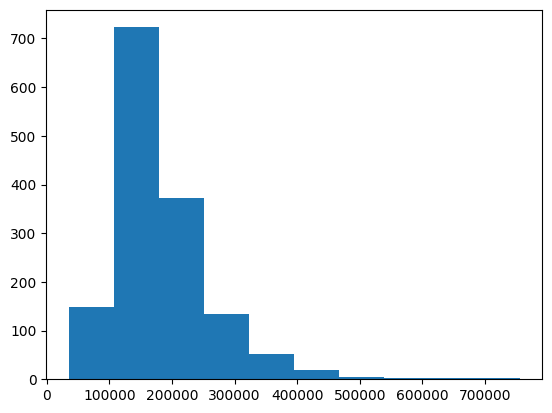

In [15]:
# plot hist
plt.hist(train['SalePrice'])

In [29]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [7]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea'], dtype='object')

In [12]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea
0,7,196.0
1,6,0.0
2,7,162.0
3,7,0.0
4,8,350.0
5,5,0.0
6,8,186.0
7,7,240.0
8,7,0.0
9,5,0.0


In [13]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [14]:
# How good is the model
model.score(X,Y)


0.7501993255220817

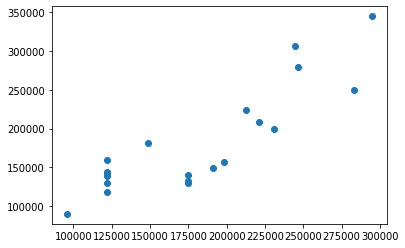

In [15]:
# Scatter plot of predictions
plt.scatter(predictions, Y)